# Over veiw

### This project demonstrates a complete workflow of exploratory data analysis (EDA) and classification modeling using two well-known datasets

## Datasets

### Iris Dataset:

#### A structured and balanced dataset used for multi-class classification.

#### Ideal for illustrating core ML concepts such as decision boundaries, model evaluation, and class separation.

### Titanic Survival Dataset:

####   A real-world dataset containing missing values, categorical features, and noisy information.

####   Provides an opportunity to apply data cleaning, feature engineering, and predictive modeling on survival outcomes.

## Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## loading the Datasets

In [2]:
# this code will load the iris data set
iris_df = pd.read_csv(r"C:\\Users\\mujta\\Downloads\\Iris.csv")

In [3]:
# this code will load the titanic data set
titanic_df = pd.read_csv(r"C:\\Users\\mujta\\Downloads\\Titanic-Dataset.csv")

# EDA for iris dataset

In [4]:
iris_df = iris_df.set_index("Id")

In [5]:
iris_df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_df.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris_df.shape

(150, 5)

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [9]:
# the iris dataset has no missing values

iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# describe function will show some statistical insights

iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris_df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
correlation = iris_df.select_dtypes(include='number').corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


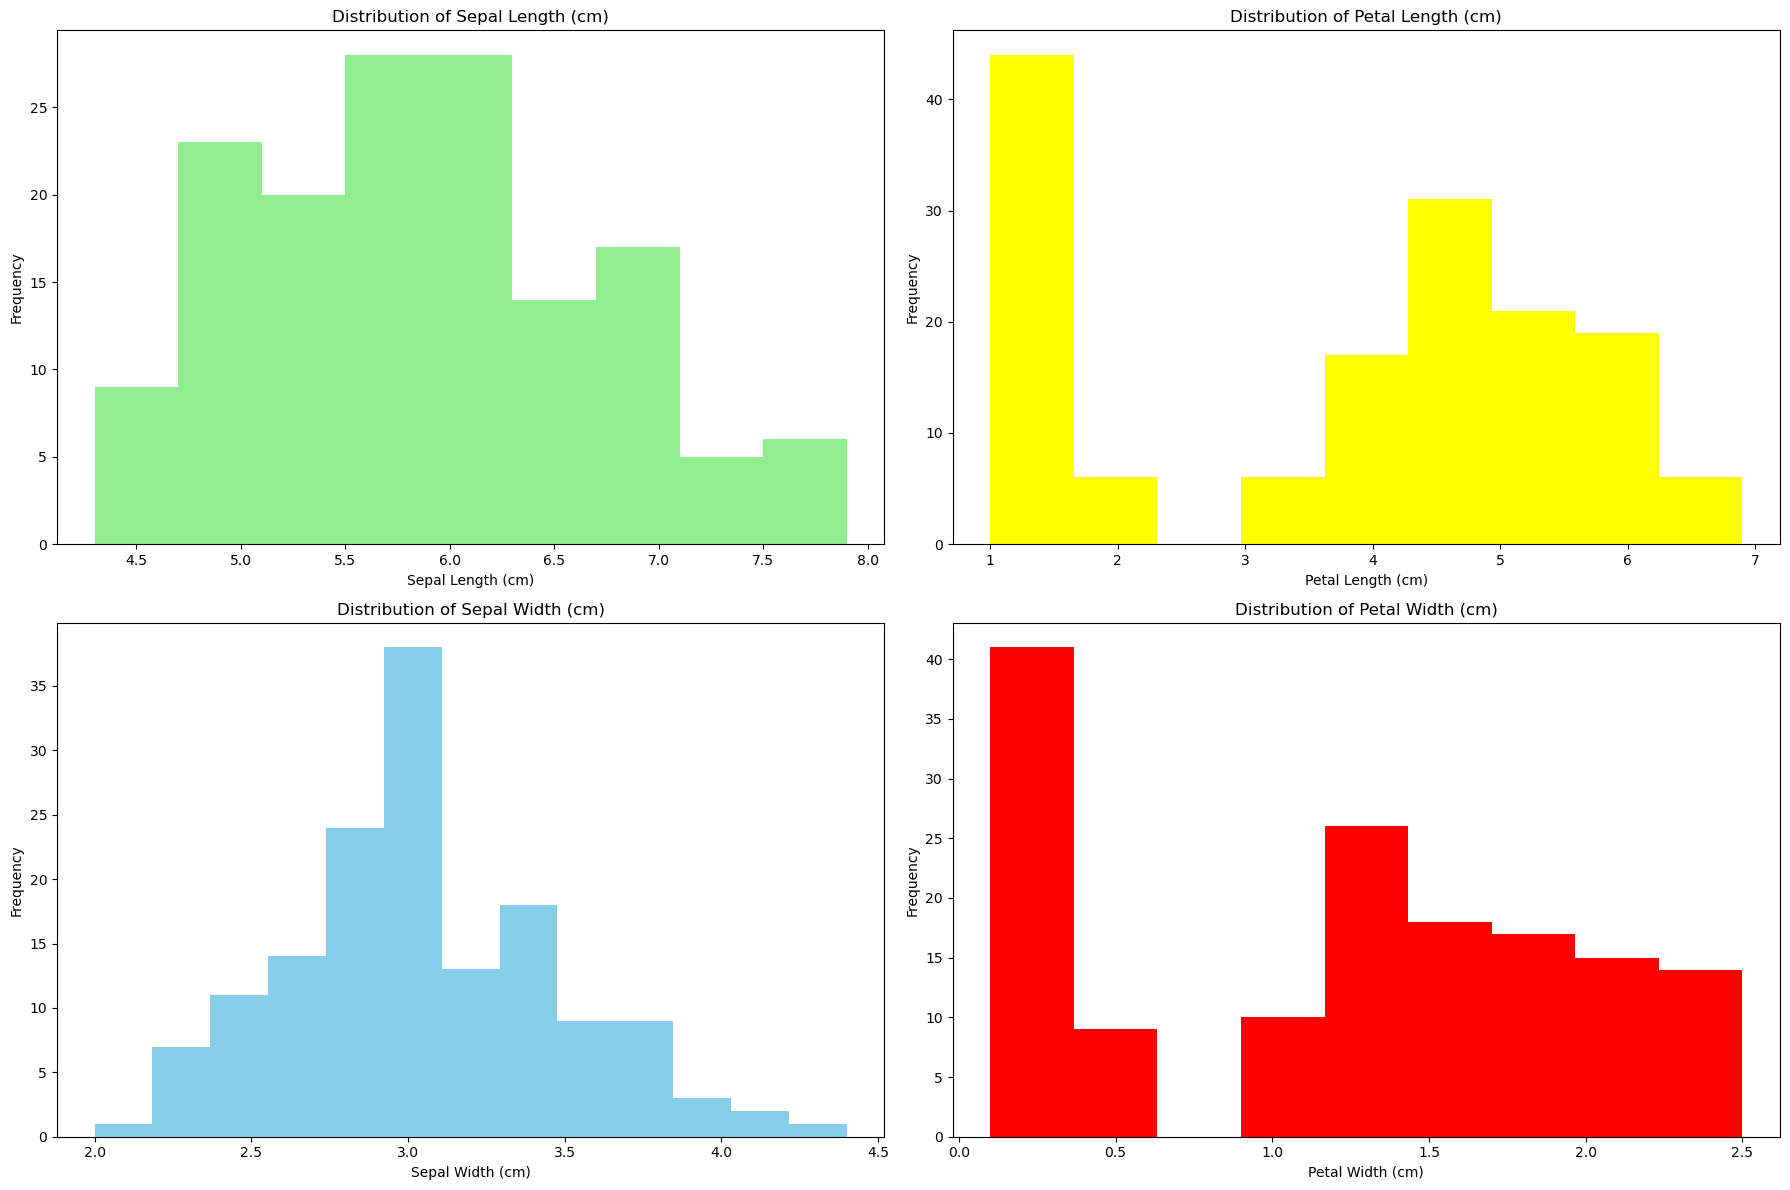

In [13]:
fig, axs = plt.subplots(2, 2, figsize = (18,12))

axs[0,0].hist(iris_df['SepalLengthCm'], bins="auto", color="lightgreen")
axs[0,0].set_title("Distribution of Sepal Length (cm)")
axs[0,0].set_xlabel("Sepal Length (cm)")
axs[0,0].set_ylabel("Frequency")

axs[1,0].hist(iris_df['SepalWidthCm'], bins="auto", color="skyblue")
axs[1,0].set_title("Distribution of Sepal Width (cm)")
axs[1,0].set_xlabel("Sepal Width (cm)")
axs[1,0].set_ylabel("Frequency")

axs[0,1].hist(iris_df['PetalLengthCm'], bins="auto", color="yellow")
axs[0,1].set_title("Distribution of Petal Length (cm)")
axs[0,1].set_xlabel("Petal Length (cm)")
axs[0,1].set_ylabel("Frequency")

axs[1,1].hist(iris_df['PetalWidthCm'], bins="auto", color="red")
axs[1,1].set_title("Distribution of Petal Width (cm)")
axs[1,1].set_xlabel("Petal Width (cm)")
axs[1,1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [14]:
print("\nSkewness of features:")
print(iris_df.select_dtypes(include="number").skew())


Skewness of features:
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64


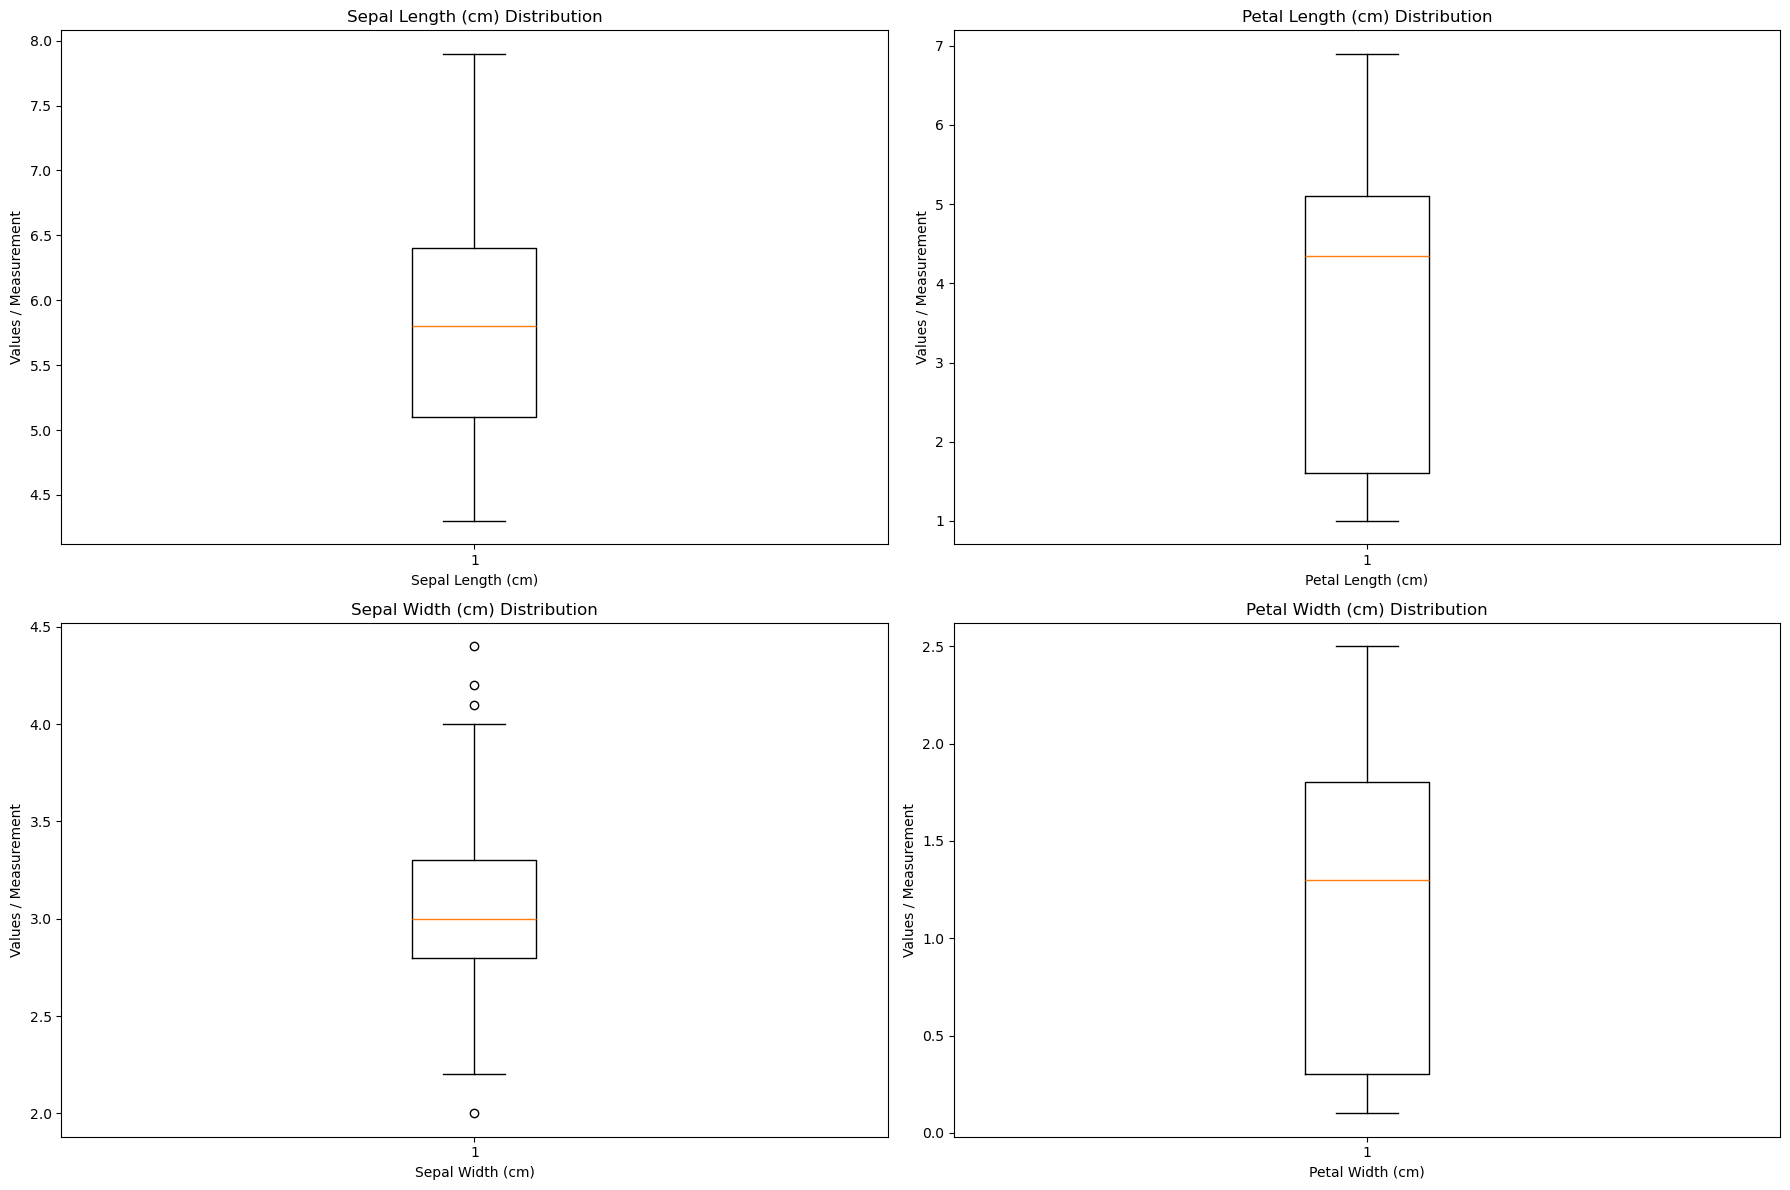

In [15]:
fig, axs = plt.subplots(2, 2, figsize = (18,12))

axs[0,0].boxplot(iris_df['SepalLengthCm'])
axs[0,0].set_title("Sepal Length (cm) Distribution")
axs[0,0].set_xlabel("Sepal Length (cm)")
axs[0,0].set_ylabel("Values / Measurement")

axs[1,0].boxplot(iris_df['SepalWidthCm'])
axs[1,0].set_title("Sepal Width (cm) Distribution")
axs[1,0].set_xlabel("Sepal Width (cm)")
axs[1,0].set_ylabel("Values / Measurement")

axs[0,1].boxplot(iris_df['PetalLengthCm'])
axs[0,1].set_title("Petal Length (cm) Distribution")
axs[0,1].set_xlabel("Petal Length (cm)")
axs[0,1].set_ylabel("Values / Measurement")

axs[1,1].boxplot(iris_df['PetalWidthCm'])
axs[1,1].set_title("Petal Width (cm) Distribution")
axs[1,1].set_xlabel("Petal Width (cm)")
axs[1,1].set_ylabel("Values / Measurement")

plt.tight_layout()
plt.show()

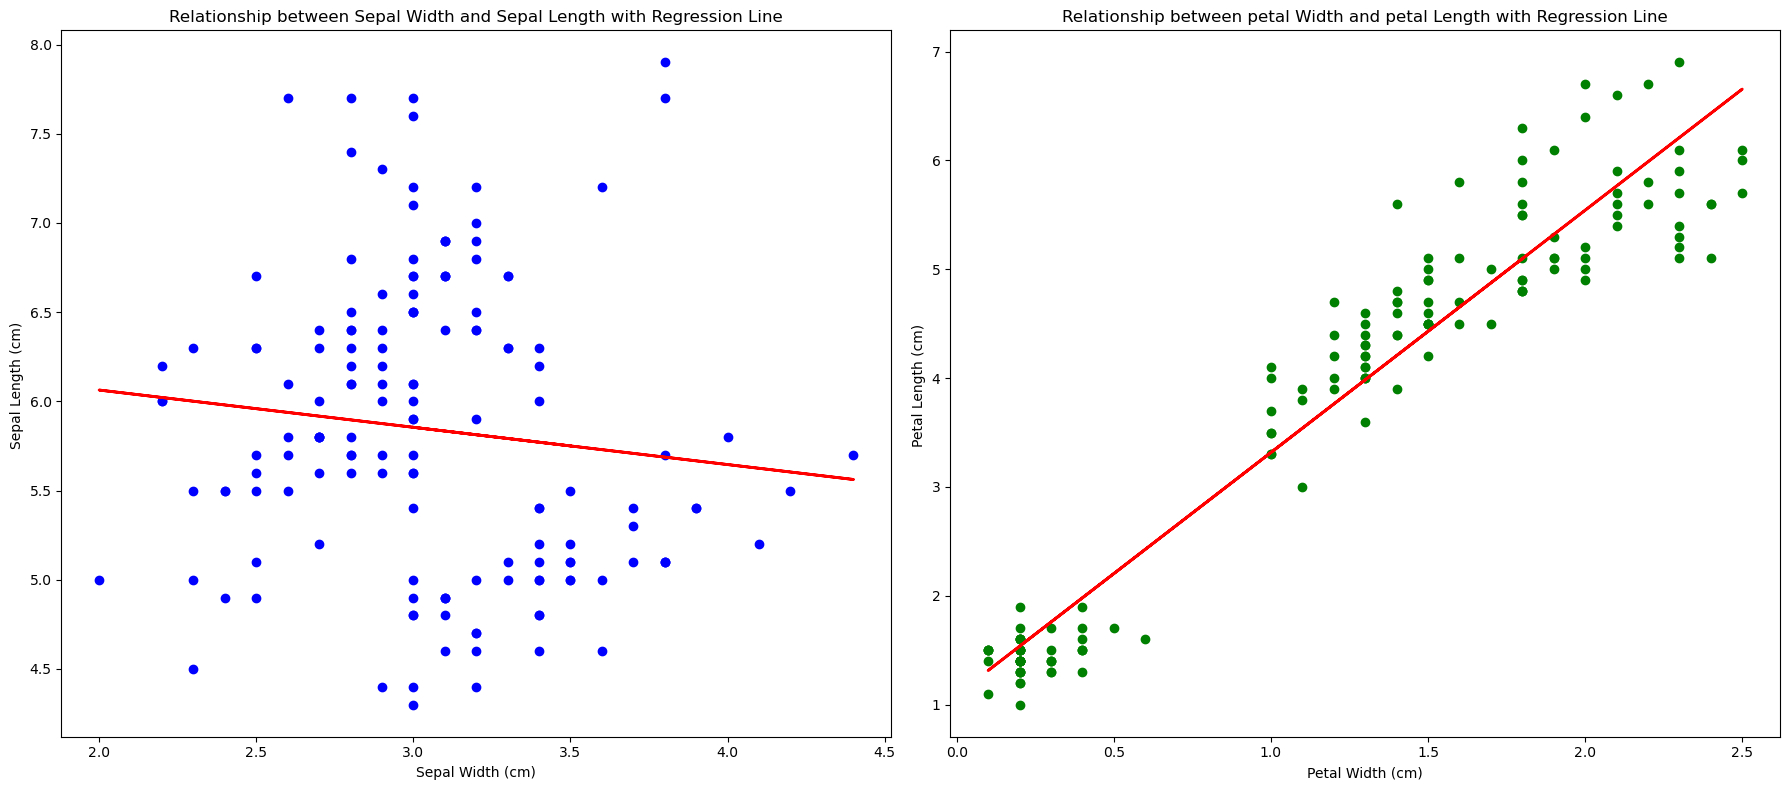

In [16]:
fig , axs = plt.subplots(1 , 2 , figsize = (18,8))

x1 = iris_df['SepalWidthCm']
y1 = iris_df['SepalLengthCm']
axs[0].scatter(x1, y1, color='b')
m1, b1 = np.polyfit(x1, y1, 1)
axs[0].plot(x1, m1*x1 + b1, color="red", linewidth=2)
axs[0].set_title("Relationship between Sepal Width and Sepal Length with Regression Line")
axs[0].set_xlabel("Sepal Width (cm)")
axs[0].set_ylabel("Sepal Length (cm) ")

x2 = iris_df['PetalWidthCm']
y2 = iris_df['PetalLengthCm']
axs[1].scatter(x2, y2, color='g')
m2, b2 = np.polyfit(x2, y2, 1)
axs[1].plot(x2, m2*x2 + b2, color="red", linewidth=2)
axs[1].set_title("Relationship between petal Width and petal Length with Regression Line")
axs[1].set_xlabel("Petal Width (cm)")
axs[1].set_ylabel("Petal Length (cm) ")

plt.tight_layout()
plt.show()

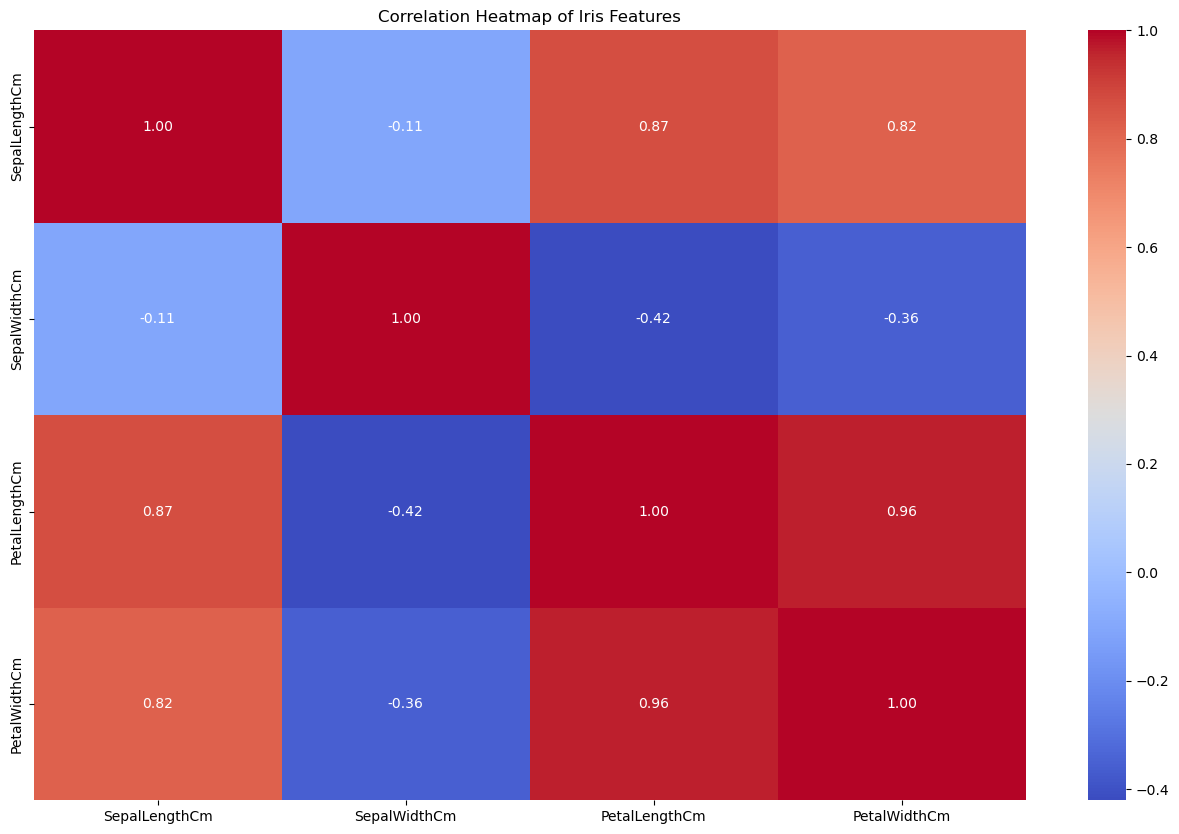

In [17]:
plt.figure(figsize = (16,10))
sns.heatmap(correlation , annot = True , cmap = "coolwarm" , fmt = ".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.show()

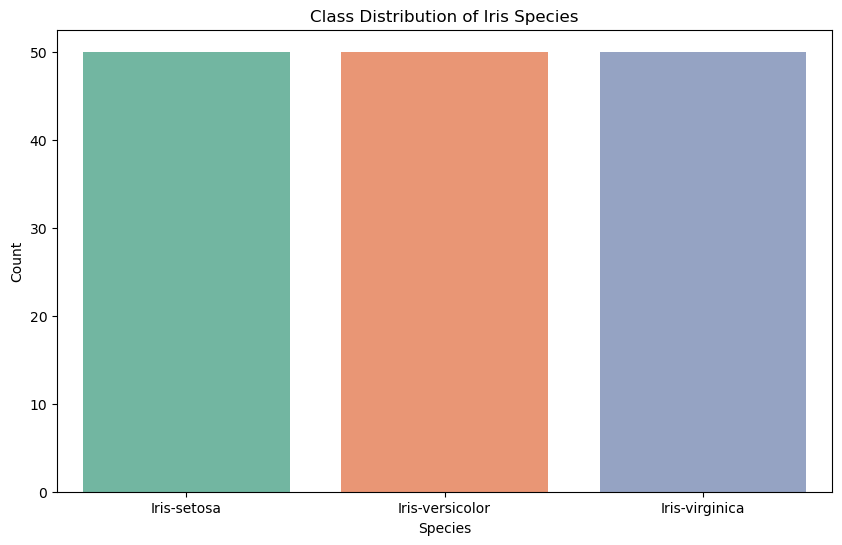

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data = iris_df, x = 'Species', hue='Species' , palette='Set2')
plt.title("Class Distribution of Iris Species")
plt.ylabel("Count")
plt.show()

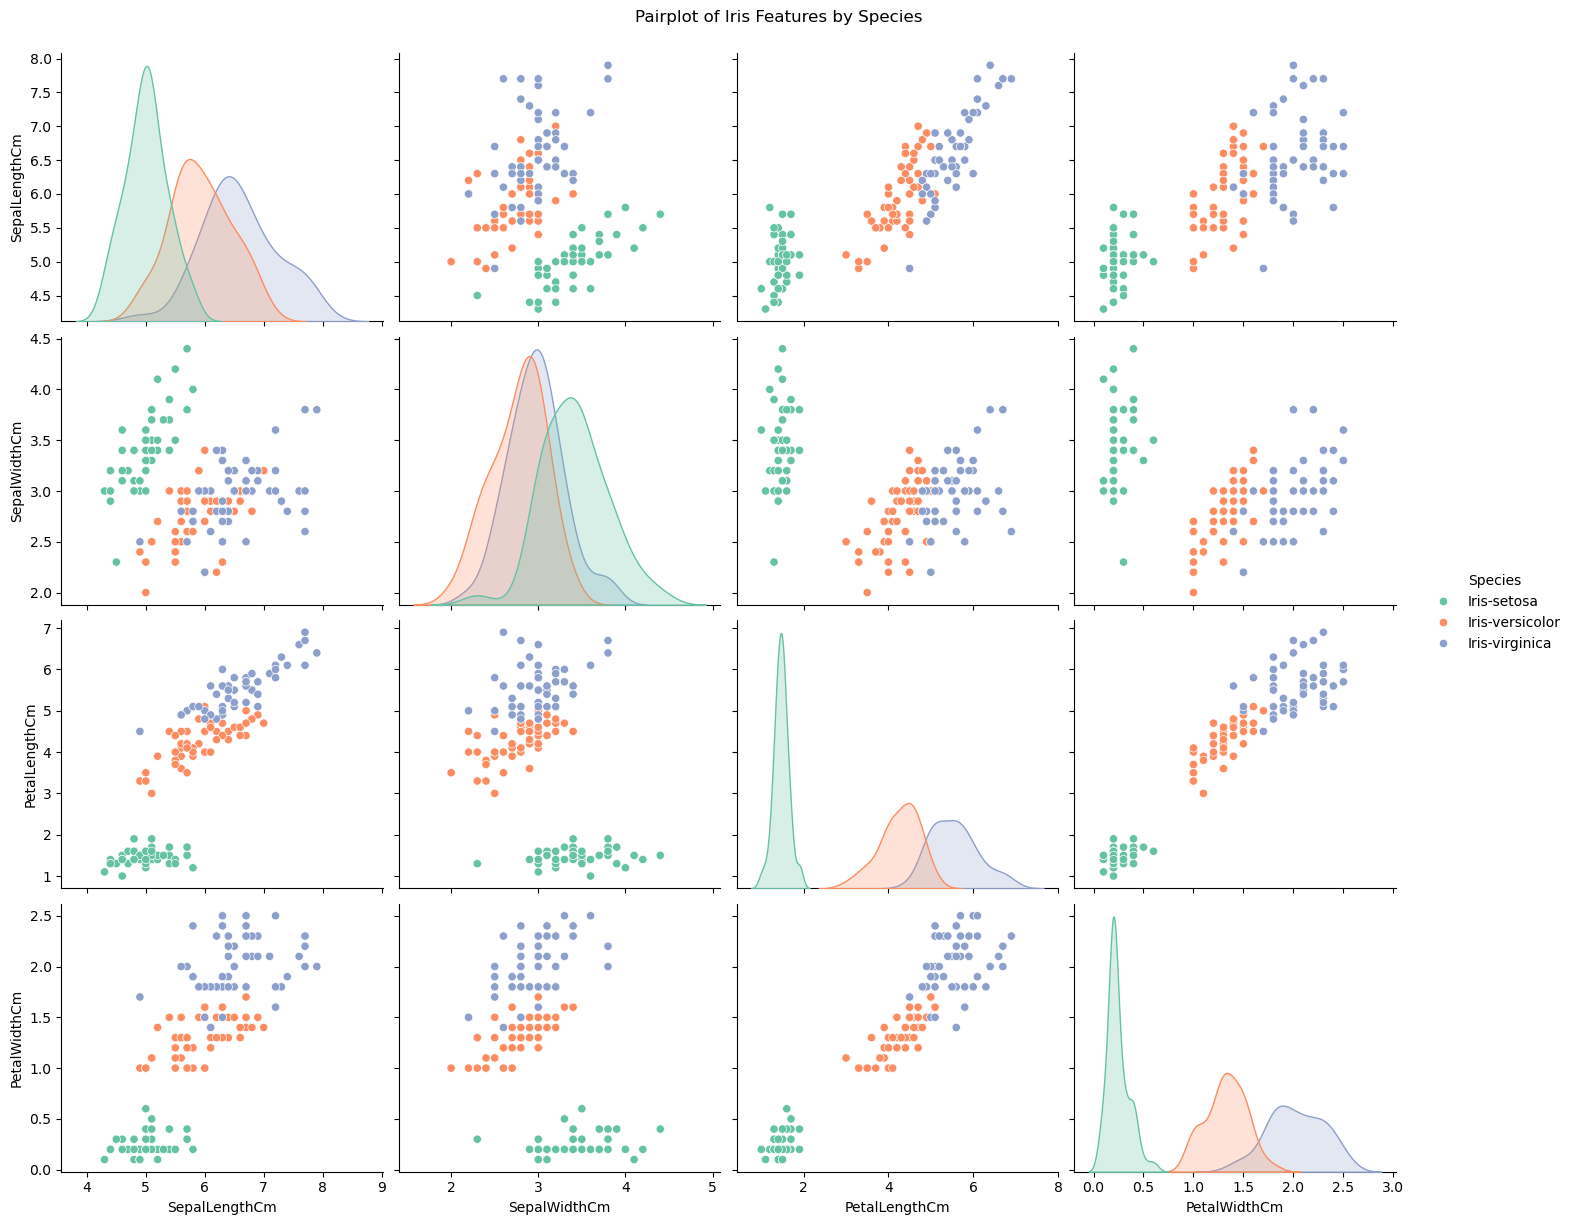

In [19]:
sns.pairplot(iris_df, hue='Species', palette='Set2', height = 3, aspect = 1.2)
plt.suptitle("Pairplot of Iris Features by Species", y = 1.02)
plt.show()

# Data cleaning and preparation for iris datraset

In [20]:
# I will create a new two col to add to the current ones to act for feature

iris_df['Sepal Area'] = iris_df['SepalLengthCm'] * iris_df['SepalWidthCm']
iris_df['Petal area'] = iris_df.PetalLengthCm * iris_df.PetalWidthCm
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal Area,Petal area
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
2,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
3,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
4,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
5,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


# Splitting data and modeling

In [21]:
x = iris_df.drop('Species' , axis = 1)
y = iris_df.Species

In [22]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2)

In [23]:
best_model = {
    'SVM': svm.SVC(),
    'RandomForest': RandomForestClassifier(),
    'LogisticReg': LogisticRegression(max_iter = 1000)}

result = []

for name, model in best_model.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    result.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred),3)
    })

print(result)

[{'Model': 'SVM', 'Accuracy': 0.967}, {'Model': 'RandomForest', 'Accuracy': 0.967}, {'Model': 'LogisticReg', 'Accuracy': 1.0}]


In [24]:
# all models accuracy were close to 100%, we can now pick one and run a grid search

In [25]:
# i decided to go with Random Forest classifier 
grid_search_par = {
    "n_estimators": [150,200,250],
    "max_depth": [None, 4, 8],
    "min_samples_split": [2, 6, 10],
    "min_samples_leaf": [1, 6, 12],
    "criterion": ["gini", "entropy"]
}

cv_grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 42) , param_grid = grid_search_par, cv = 5 , scoring = "accuracy", n_jobs = -1 , verbose=1)

cv_grid_search.fit(x_train, y_train)

print(f"\nBest parameters: {cv_grid_search.best_params_}")
print(f"Best CV score: {cv_grid_search.best_score_:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.9583


In [26]:
# after running multple round of grid search, the result of the accuracy is the same with the defult parameters of the RFC classifier

In [27]:
clf = RandomForestClassifier(random_state = 42)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
classification = classification_report(y_test , y_pred)
print(classification)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



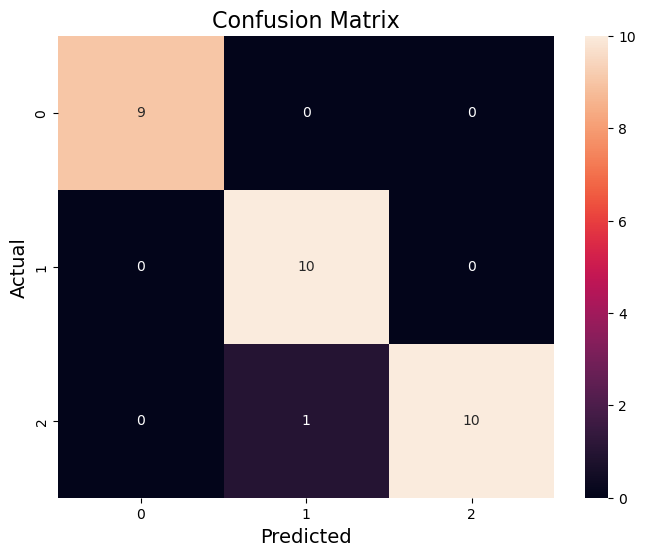

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("Actual", fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.show()

In [29]:
# an example to test the model

new_sample = pd.DataFrame([[1.8, 2.8, 4.1, 1.3, 15.96, 5.33]] , columns = x_train.columns)

prediction = clf.predict(new_sample)

print("New Sample Prediction:")
print(f"Predicted Class: {prediction[0]}")

New Sample Prediction:
Predicted Class: Iris-versicolor


# Conclusion

### I performed EDA, feature engineering, and trained a tuned Random Forest Classifier on the Iris dataset.
### The model achieved high accuracy on the test set,as confirmed by the classification report and confusion matrix.
### Finally, I predicted a new sample, which was correctly classified as Iris-versicolor, showing that the model generalizes well to unseen data.

# Now I will start on the Titanic Survival dataset

# EDA for Titanic Survival dataset

In [30]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
titanic_df.shape

(891, 12)

In [32]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
titanic_df.duplicated().sum()

np.int64(0)

In [34]:
#the sex col is in object format 

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
# target distribution
round(titanic_df.Survived.value_counts(normalize=True)*100,2)

Survived
0    61.62
1    38.38
Name: proportion, dtype: float64

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
titanic_correlation = titanic_df.select_dtypes(include='number').corr()
titanic_correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


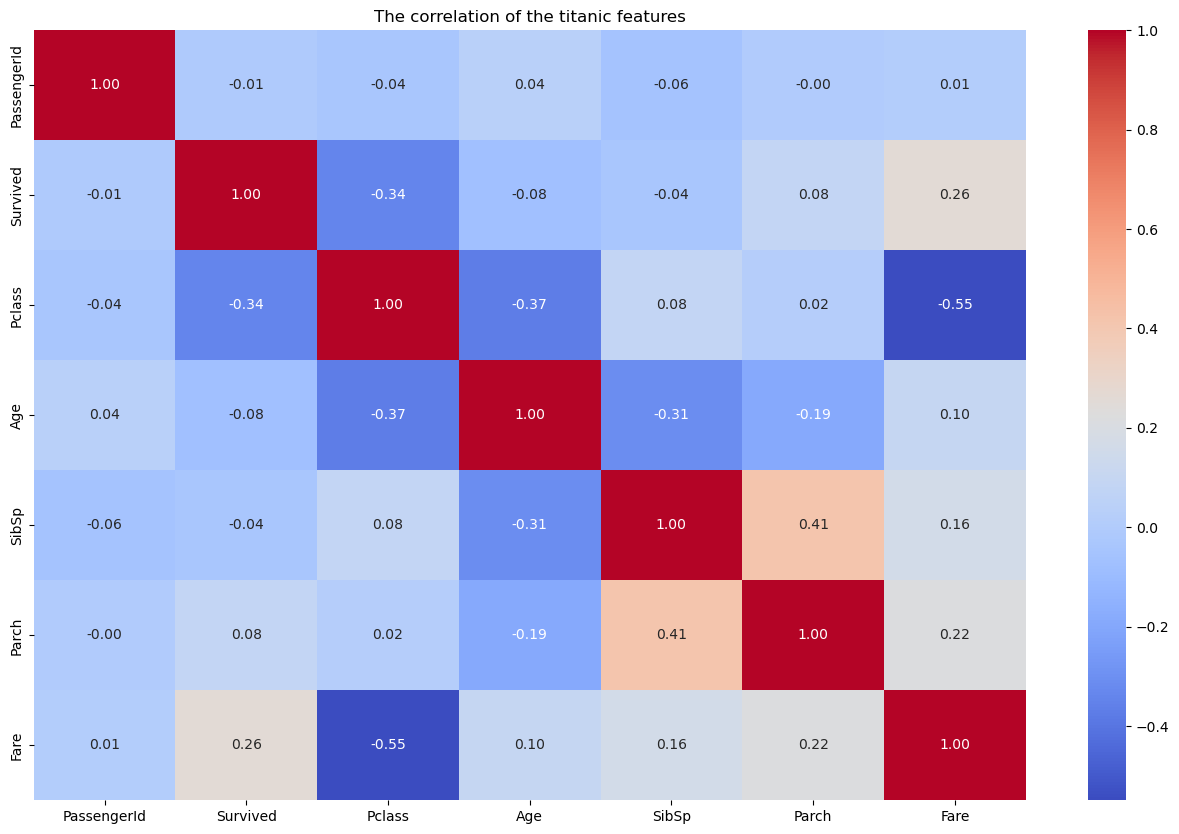

In [39]:
plt.figure(figsize=(16,10))
sns.heatmap(titanic_correlation , annot = True , cmap = "coolwarm" , fmt = ".2f")
plt.title("The correlation of the titanic features")
plt.show()

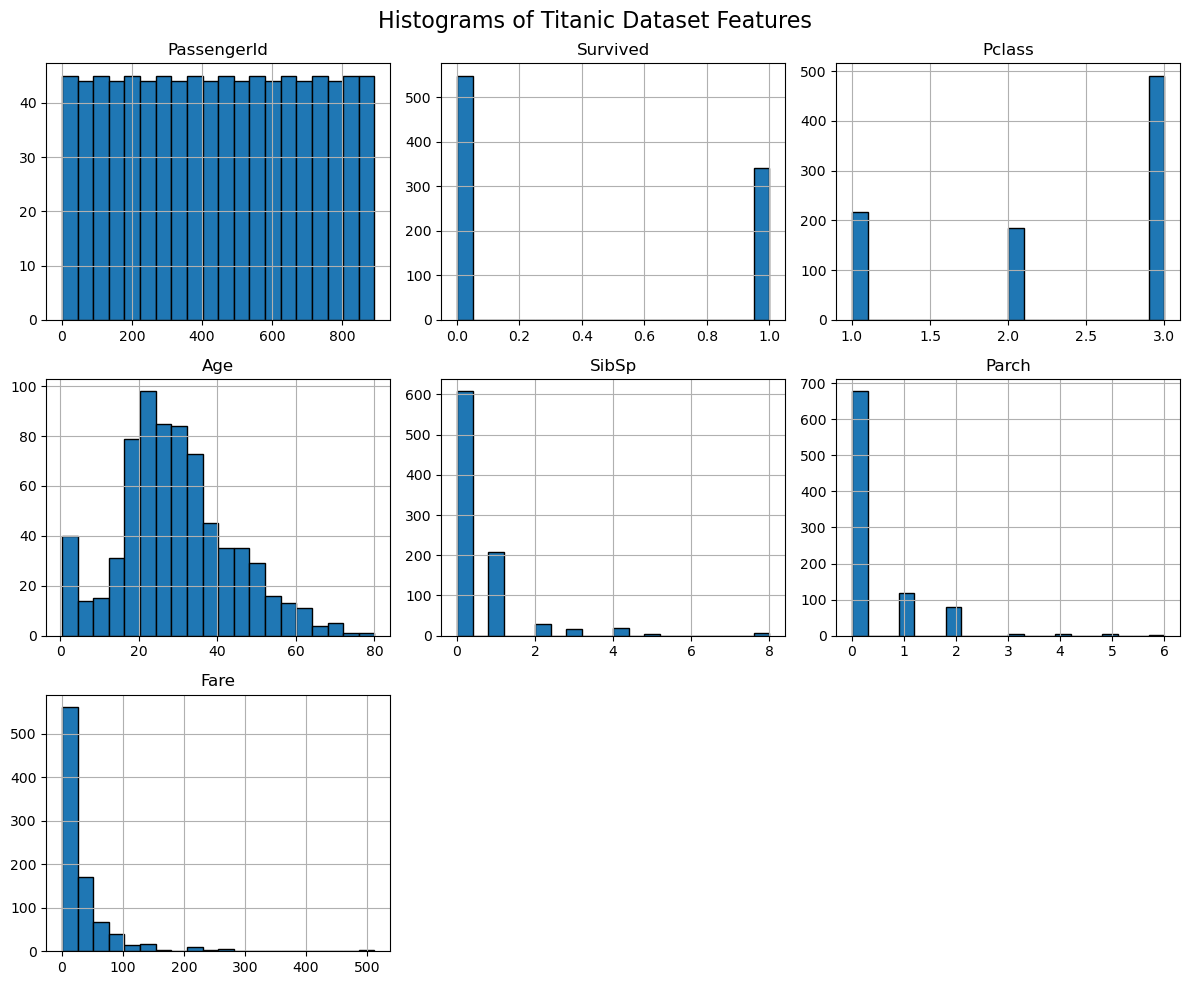

In [40]:
numeric_cols = titanic_df.select_dtypes(include=['number']).columns
titanic_df[numeric_cols].hist(figsize=(12, 10) , bins = 20 ,edgecolor="black")
plt.suptitle("Histograms of Titanic Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()

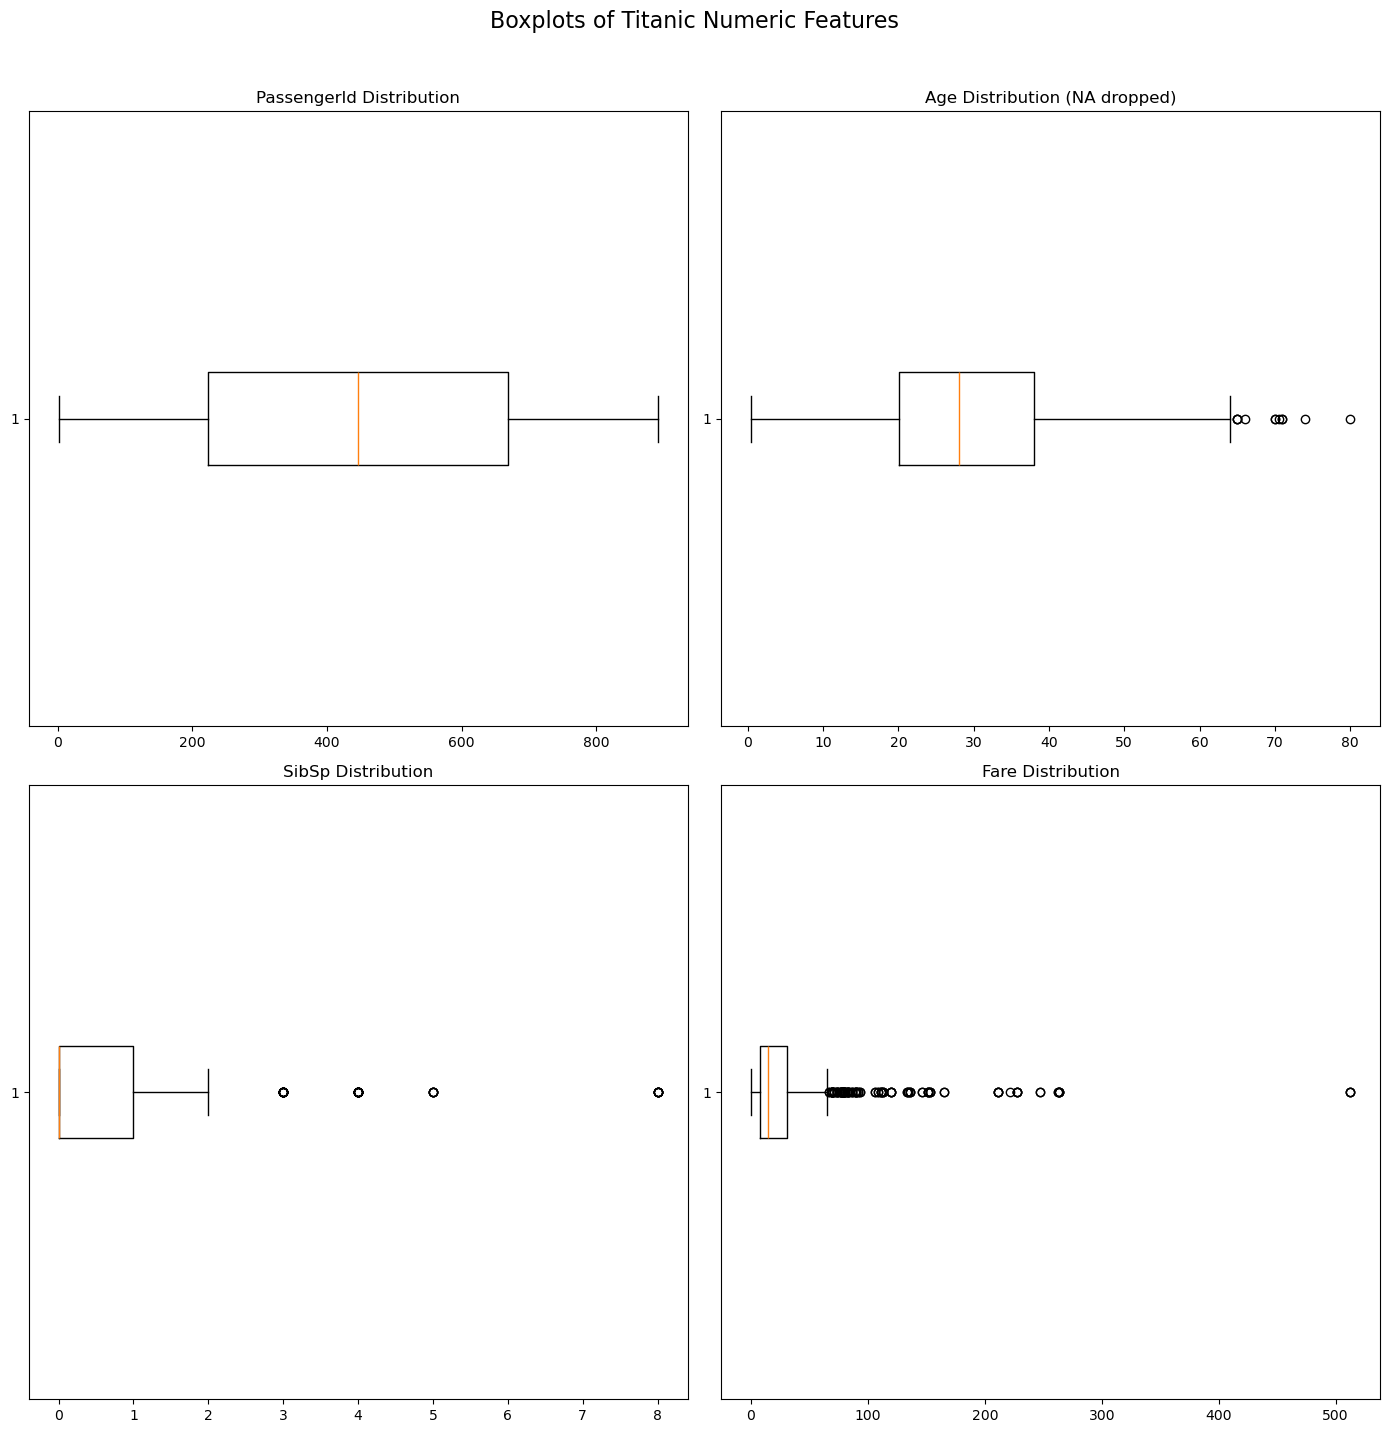

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
axs = axs.flatten()

axs[0].boxplot(titanic_df['PassengerId'] , vert = False)
axs[0].set_title("PassengerId Distribution", fontsize=12)

# Row 2
axs[1].boxplot(titanic_df['Age'].dropna(), vert=False)
axs[1].set_title("Age Distribution (NA dropped)", fontsize=12)

axs[2].boxplot(titanic_df['SibSp'] , vert = False)
axs[2].set_title("SibSp Distribution", fontsize=12)

axs[3].boxplot(titanic_df['Fare'], vert=False)
axs[3].set_title("Fare Distribution", fontsize=12)

plt.suptitle("Boxplots of Titanic Numeric Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


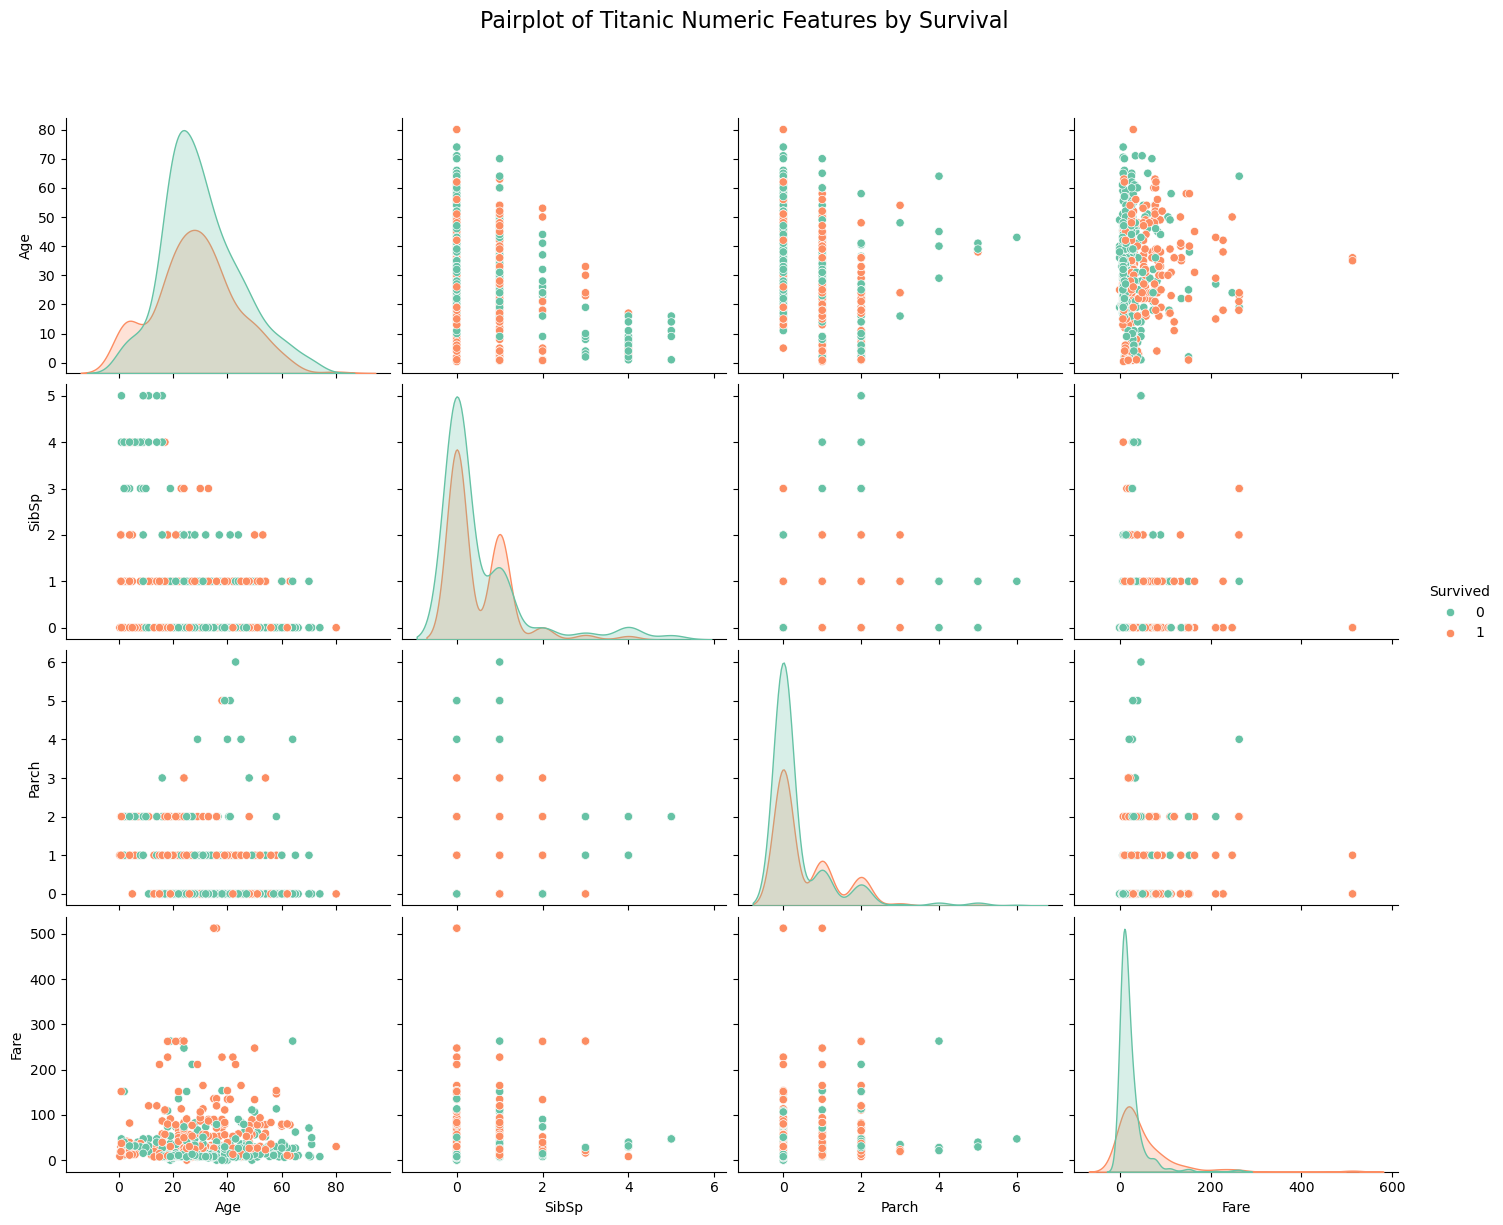

In [42]:
pairplot_cols = ['Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(titanic_df[pairplot_cols + ['Survived']].dropna(),hue='Survived',palette='Set2',height=3,aspect=1.2,diag_kind='kde')
plt.suptitle("Pairplot of Titanic Numeric Features by Survival", y=1.02, fontsize=16)
plt.subplots_adjust(top=0.93)  # more space for title
plt.show()

C:\Users\mujta\AppData\Local\Temp\ipykernel_54620\225007522.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = titanic_df, x = 'Pclass', y = 'Survived' , palette = 'Set2', ax = axs[1], errorbar = None)


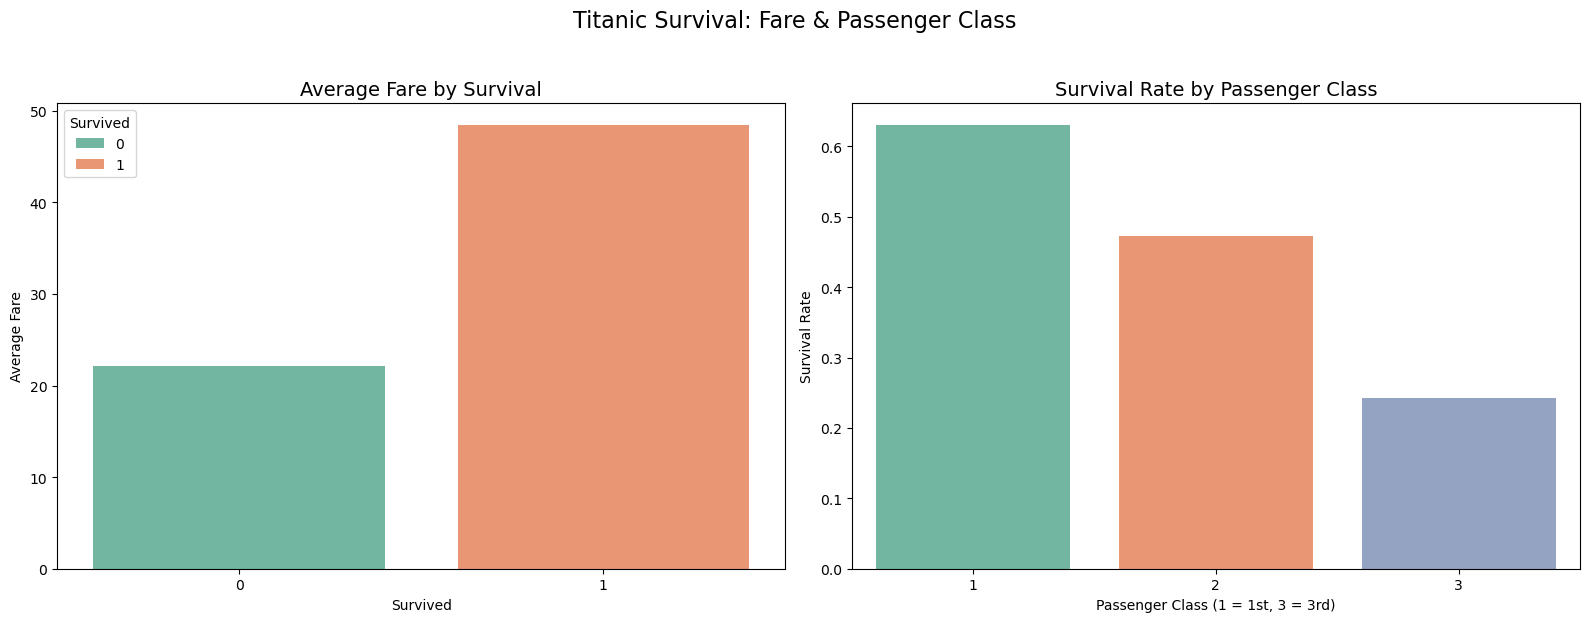

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data = titanic_df , x = 'Survived' , y = 'Fare', hue = 'Survived' , palette = 'Set2' , ax = axs[0] , errorbar = None)
axs[0].set_title("Average Fare by Survival", fontsize=14)
axs[0].set_xlabel("Survived")
axs[0].set_ylabel("Average Fare")

sns.barplot(data = titanic_df, x = 'Pclass', y = 'Survived' , palette = 'Set2', ax = axs[1], errorbar = None)
axs[1].set_title("Survival Rate by Passenger Class", fontsize=14)
axs[1].set_xlabel("Passenger Class (1 = 1st, 3 = 3rd)")
axs[1].set_ylabel("Survival Rate")

plt.suptitle("Titanic Survival: Fare & Passenger Class", fontsize = 16, y = 1.03)
plt.tight_layout()
plt.show()

In [44]:
print("\nSkewness of features:")
print(titanic_df.select_dtypes(include="number").skew())


Skewness of features:
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


# Data cleaning and preparation for the titanic dataset

In [45]:
# re creating the sex col as 0 for female and 1 for male to be included in the features

titanic_df['Sex'] = titanic_df['Sex'].map({'male' : 1 ,'female' : 0})

In [46]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [47]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
# the cabin column are over 80% Na, I will drop it 
titanic_df = titanic_df.drop(columns="Cabin")

In [49]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [50]:
# name and passenger Id and Ticket are irrelvent columns
titanic_df = titanic_df.drop(columns = ['Name','PassengerId','Ticket'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [51]:
# I will drop the na in the Embarked columns because it's only two na it will not reduce the total dataset by alot

titanic_df = titanic_df.dropna(subset=['Embarked'])

In [52]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.5+ KB


In [53]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [54]:
# now I will fill the age Na with the mean 

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [55]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [56]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [57]:
# now I will map the Embarked col to S : 0 , C : 1 , Q : 2 

titanic_df['Embarked'] = titanic_df['Embarked'].map({ 'S' : 0 , 'C' : 1 ,'Q' : 2})
titanic_df['Embarked'].value_counts()

Embarked
0    644
1    168
2     77
Name: count, dtype: int64

In [58]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


# Splitting data and modeling

In [59]:
titanic_df.Survived.value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [60]:
# i will create a balanced traning and testing set for best result

In [61]:
df_0 = titanic_df[titanic_df['Survived'] == 0].sample(340, random_state = 2022)
df_1 = titanic_df[titanic_df['Survived'] == 1].sample(340, random_state = 2022) 

balanced_df = pd.concat([df_0, df_1])

balanced_df = balanced_df.sample(frac=1, random_state=2022).reset_index(drop=True)

print(balanced_df['Survived'].value_counts())

Survived
1    340
0    340
Name: count, dtype: int64


In [62]:
balanced_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,49.0,1,0,56.9292,1
1,0,1,1,47.0,0,0,34.0208,0
2,0,3,1,27.0,1,0,14.4542,1
3,0,1,1,28.0,0,0,47.1000,0
4,1,1,0,18.0,0,2,79.6500,0


In [63]:
x = balanced_df.drop(columns = "Survived")
y = balanced_df.Survived

In [64]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [65]:
best_model = {
    'SVM': svm.SVC(),
    'RandomForest': RandomForestClassifier(),
    'LogisticReg': LogisticRegression(max_iter = 1000)}

result = []

for name, model in best_model.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    result.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred),3)
    })

print(result)

[{'Model': 'SVM', 'Accuracy': 0.654}, {'Model': 'RandomForest', 'Accuracy': 0.838}, {'Model': 'LogisticReg', 'Accuracy': 0.779}]


In [66]:
# Logistic Reg and RandomForest had a high results and very close to each other, I will run GridSearch for both of them, for hyperparamter tuning

In [67]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.05, 0.1, 1, 10, 100],                  
    'solver': ['liblinear', 'saga'],               
    'max_iter': [200,250,300],
    'class_weight' : ['balanced']
}

grid_search = GridSearchCV(LogisticRegression(random_state = 42) , param_grid = param_grid, cv = 5 , scoring = 'accuracy' , n_jobs = -1 , verbose = 1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7775


In [68]:
RandomForest_param_grid = {
    'n_estimators': [75, 100, 125],  
    'max_depth': [10, 12, 15],            
    'min_samples_split': [7, 8, 9],      
    'min_samples_leaf': [1, 2, 3],       
    'max_features': ['sqrt', 'log2'],      
    'bootstrap': [True, False]
}

RandomForest_grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 42), param_grid = RandomForest_param_grid , cv = 5 , scoring='accuracy' , n_jobs = -1 , verbose = 1)
RandomForest_grid_search.fit(x_train, y_train)

print("Best Parameters:", RandomForest_grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {RandomForest_grid_search.best_score_:.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8161


In [69]:
# RandomForest 85% out preformed Log_Reg 80% 

In [80]:
clf = RandomForest_grid_search.best_estimator_
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("\nClassification Report on Raw Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Raw Test Set:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        60
           1       0.90      0.79      0.84        76

    accuracy                           0.83       136
   macro avg       0.83      0.84      0.83       136
weighted avg       0.84      0.83      0.83       136



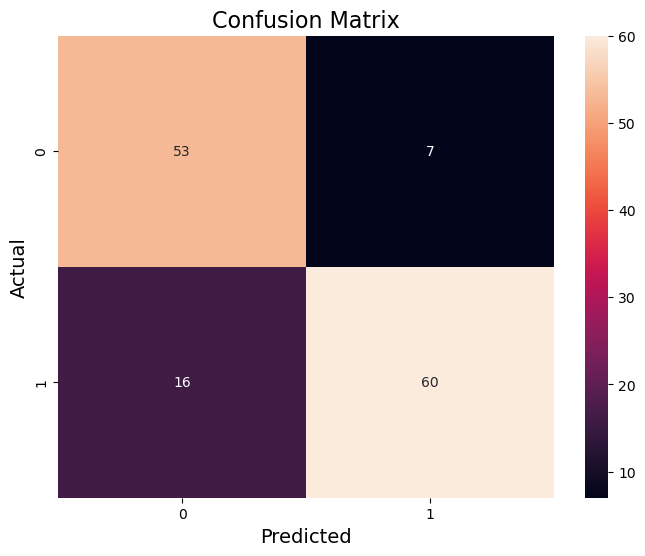

In [71]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("Actual", fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.show()

In [72]:
# I will now re train the model but with scaled data hoping to get a better result

In [73]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForest_grid_search.best_estimator_)
])

In [74]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=3,
                                        min_samples_split=7,
                                        random_state=42))])

In [75]:
pipeline.fit(x_train , y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=3,
                                        min_samples_split=7,
                                        random_state=42))])

In [77]:
y_pred_scaled = pipeline.predict(x_test)

In [79]:
print("\n Classification report with the scaled data")
print(classification_report(y_test , y_pred_scaled))


 Classification report with the scaled data
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        60
           1       0.90      0.79      0.84        76

    accuracy                           0.83       136
   macro avg       0.83      0.84      0.83       136
weighted avg       0.84      0.83      0.83       136



In [204]:
# I will explore which features were the most helpful in terms of predicting 

In [205]:
feature_importance = clf.feature_importances_
feature_names = x_train.columns

feature_df = pd.DataFrame({'Feature names' : feature_names , 'Feature importance' : feature_importance})
feature_df = feature_df.sort_values(by = 'Feature importance' , ascending = False)
feature_df.head(10)

,Feature names,Feature importance
1,Sex,0.369565
5,Fare,0.224403
2,Age,0.184947
0,Pclass,0.100959
3,SibSp,0.055777
6,Embarked,0.032907
4,Parch,0.031442


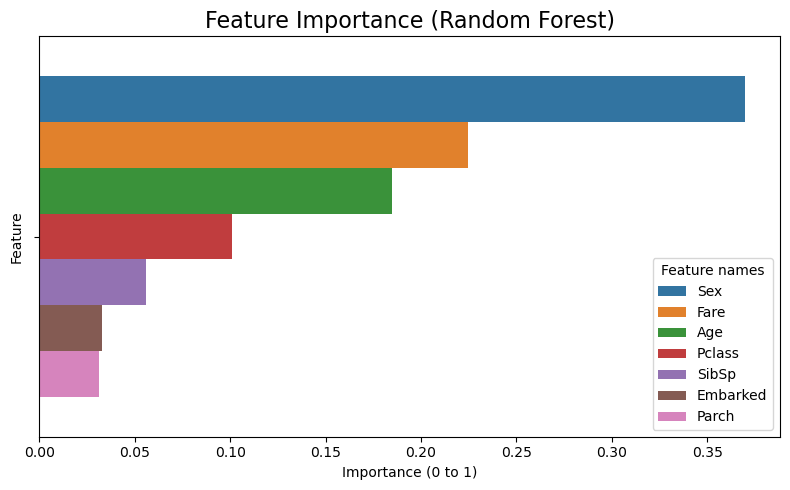

In [206]:
plt.figure(figsize=(8, 5))
sns.barplot(data = feature_df, x = 'Feature importance', hue = 'Feature names', legend = True)
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Importance (0 to 1)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Conclusion

### The Titanic dataset analysis revealed several critical insights into survival outcomes.
### Exploratory data analysis showed that sex, passenger class, and fare were the most important predictors of survival.
### After data cleaning (handling missing values, dropping irrelevant columns, encoding categorical variables),
### we trained multiple models and performed hyperparameter tuning using GridSearchCV.
### The best-performing model, a tuned Random Forest Classifier, achieved ~81–83% accuracy with balanced precision and recall.
### Overall, the analysis confirms that women and passengers in higher classes had a significantly better chance of survival.

# Final Project Conclusion (Iris + Titanic)

#### This notebook successfully demonstrates a complete end-to-end machine learning workflow on two datasets of increasing complexity.
#### The Iris dataset provided a clean, balanced introduction to classification, allowing us to visualize clear decision boundaries and test models under ideal conditions.
#### The Titanic dataset, in contrast, introduced real-world challenges such as missing data, categorical encoding, class imbalance, and the need for careful model selection.

#### Together, these projects illustrate the full pipeline: EDA → data preparation → visualization → feature engineering → model tuning → evaluation.
#### The final models not only achieved strong performance but also produced actionable insights — showing which factors most influence outcomes.